In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df= pd.read_csv('HRDataset_v14.csv')
df.head(20)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
Employee_Name                 311 non-null object
EmpID                         311 non-null int64
MarriedID                     311 non-null int64
MaritalStatusID               311 non-null int64
GenderID                      311 non-null int64
EmpStatusID                   311 non-null int64
DeptID                        311 non-null int64
PerfScoreID                   311 non-null int64
FromDiversityJobFairID        311 non-null int64
Salary                        311 non-null int64
Termd                         311 non-null int64
PositionID                    311 non-null int64
Position                      311 non-null object
State                         311 non-null object
Zip                           311 non-null int64
DOB                           311 non-null object
Sex                           311 non-null object
MaritalDesc                   311 non-null object
Citizen

In [4]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


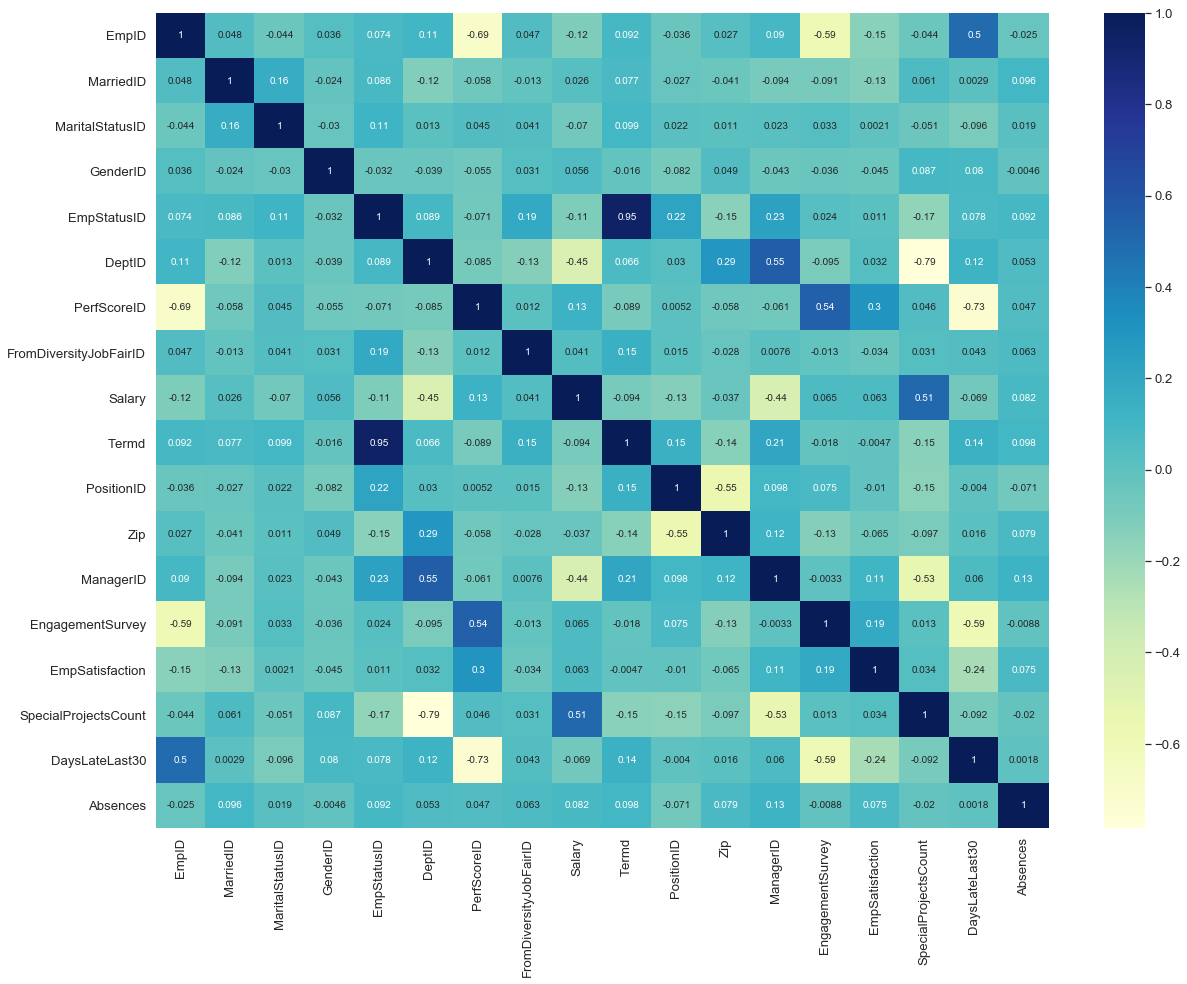

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

# Data exploration 

In [6]:
# Check unique values for each fields except a few ones not so relevant
for c in df.columns:
    if df[c].dtype == object and (c not in ('Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'ManagerName')):
        print(c, df[c].unique())

Position ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
State ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex ['M ' 'F']
MaritalDesc ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
HispanicLatino ['No' 'Yes' 'no' 'yes']
RaceDesc ['White'

In [7]:
df['MarriedID'].value_counts()

0    187
1    124
Name: MarriedID, dtype: int64

In [8]:
df['MaritalStatusID'].value_counts()
df['MaritalDesc'].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [9]:
df['GenderID'].value_counts()
df['Sex'].value_counts()

F     176
M     135
Name: Sex, dtype: int64

In [10]:
df['EmpStatusID'].value_counts()

1    184
5     88
4     14
3     14
2     11
Name: EmpStatusID, dtype: int64

In [11]:
df['EmploymentStatus'].value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

* (1,2,3=active , 4= Terminated for Cause , 5= Voluntarily Terminated)

In [12]:
EmpStatus= df[['EmpStatusID','EmploymentStatus']]
EmpStatus.head(20)

,EmpStatusID,EmploymentStatus
0,1,Active
1,5,Voluntarily Terminated
2,5,Voluntarily Terminated
3,1,Active
4,5,Voluntarily Terminated
5,1,Active
6,1,Active
7,1,Active
8,3,Active
9,1,Active


In [13]:
df['DeptID'].value_counts()
df['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [14]:
df['PerfScoreID'].value_counts()
df['PerformanceScore'].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

In [15]:
df['FromDiversityJobFairID'].value_counts()

0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

In [16]:
df['PositionID'].value_counts()
df['Position'].value_counts()

Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Sales Manager                     3
Senior BI Developer               3
Administrative Assistant          3
Accountant I                      3
IT Manager - DB                   2
Sr. Accountant                    2
Sr. DBA                           2
Director of Operations            1
Data Architect                    1
Shared Services Manager           1
CIO                               1
Data Analyst                      1
BI Director                       1
Enterprise Architect              1
IT Manager - Infra                1
Director of Sales                 1
Principal Data Architect    

In [17]:
df['ManagerID'].value_counts()
df['ManagerName'].value_counts()

Michael Albert        22
Elijiah Gray          22
Brannon Miller        22
Kelley Spirea         22
Kissy Sullivan        22
Amy Dunn              21
Ketsia Liebig         21
David Stanley         21
Webster Butler        21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

In [18]:
#df['State'].value_counts()    
#df['Zip'].value_counts()

In [19]:
df['DOB'].unique()

array(['07/10/83', '05/05/75', '09/19/88', '09/27/88', '09/08/89',
       '05/22/77', '05/24/79', '02/18/83', '02/11/70', '01/07/88',
       '01/12/74', '02/21/74', '07/04/88', '07/20/83', '07/15/77',
       '10/18/81', '04/17/66', '10/27/70', '04/04/86', '04/06/79',
       '12/22/70', '12/27/58', '09/01/89', '09/21/90', '01/16/67',
       '07/30/64', '04/04/87', '03/10/70', '08/24/90', '11/24/87',
       '07/28/83', '10/30/69', '06/01/64', '03/02/80', '08/19/77',
       '11/22/66', '08/09/83', '04/05/87', '02/02/83', '06/06/86',
       '05/15/63', '01/02/51', '02/09/72', '02/12/79', '08/24/83',
       '06/11/70', '08/27/83', '05/31/88', '09/05/85', '08/31/81',
       '11/25/78', '08/26/80', '09/08/77', '08/12/79', '12/17/75',
       '03/19/83', '03/31/77', '08/26/86', '04/10/87', '09/09/65',
       '04/19/90', '01/18/52', '11/05/78', '09/14/79', '04/15/88',
       '10/31/77', '07/05/79', '11/02/75', '02/25/51', '04/19/67',
       '09/04/83', '11/15/82', '05/14/87', '12/02/78', '10/07/

In [20]:
df['MaritalDesc'].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [21]:
df['CitizenDesc'].value_counts()

US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

In [22]:
df['HispanicLatino'].value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

In [23]:
df['RaceDesc'].value_counts()

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64

In [24]:
df['DateofHire'].unique()

array(['7/5/2011', '3/30/2015', '1/7/2008', '7/11/2011', '1/9/2012',
       '11/10/2014', '9/30/2013', '7/6/2009', '1/5/2015', '1/10/2011',
       '4/2/2012', '2/20/2012', '9/24/2012', '2/21/2011', '7/21/2016',
       '4/4/2011', '7/7/2014', '7/8/2013', '8/19/2013', '2/17/2014',
       '2/16/2015', '10/27/2008', '9/29/2014', '11/11/2013', '8/15/2011',
       '3/5/2012', '1/28/2016', '3/31/2014', '6/30/2016', '8/18/2014',
       '9/6/2016', '5/12/2014', '5/14/2012', '6/27/2011', '10/3/2011',
       '9/5/2012', '5/16/2011', '8/30/2010', '7/6/2016', '7/20/2010',
       '1/5/2009', '5/5/2014', '7/2/2012', '11/7/2011', '7/9/2018',
       '2/15/2017', '1/7/2013', '1/5/2014', '9/18/2014', '4/26/2010',
       '5/2/2011', '5/11/2015', '4/15/2011', '9/6/2011', '5/1/2010',
       '6/2/2015', '4/20/2017', '3/7/2012', '11/28/2011', '8/13/2012',
       '6/6/2016', '6/5/2015', '11/5/2012', '1/6/2014', '9/26/2011',
       '3/7/2011', '7/9/2012', '10/2/2016', '1/5/2016', '4/30/2012',
       '1/21/2011'

In [25]:
df['DateofTermination'].value_counts()
df['Termd'].value_counts()

0    207
1    104
Name: Termd, dtype: int64

In [26]:
df['TermReason'].value_counts()

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
military                              4
retiring                              4
no-call, no-show                      4
performance                           4
maternity leave - did not return      3
medical issues                        3
gross misconduct                      1
Fatal attraction                      1
Learned that he is a gangster         1
Name: TermReason, dtype: int64

In [27]:
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [28]:
df['EngagementSurvey'].unique()

array([4.6 , 4.96, 3.02, 4.84, 5.  , 3.04, 4.46, 4.2 , 4.28, 4.4 , 4.5 ,
       2.  , 4.8 , 3.5 , 3.39, 3.35, 3.19, 3.14, 4.51, 3.25, 3.84, 4.43,
       3.3 , 3.8 , 3.  , 4.3 , 3.58, 4.7 , 4.1 , 4.13, 3.7 , 4.73, 4.12,
       4.62, 3.1 , 3.96, 3.79, 1.93, 1.12, 3.01, 2.3 , 3.88, 3.4 , 4.11,
       4.77, 4.52, 2.9 , 2.1 , 4.  , 3.13, 1.56, 1.2 , 4.76, 3.66, 3.73,
       4.24, 3.97, 3.9 , 4.61, 4.63, 4.64, 4.17, 3.6 , 3.03, 4.48, 3.24,
       3.72, 2.34, 3.99, 3.75, 3.07, 4.83, 3.49, 3.38, 3.65, 4.78, 4.9 ,
       4.88, 4.53, 3.18, 4.65, 3.08, 3.93, 4.18, 4.37, 2.39, 3.81, 4.29,
       2.33, 4.25, 3.89, 3.54, 2.4 , 3.45, 4.16, 3.17, 4.15, 3.98, 4.36,
       3.69, 4.94, 2.6 , 3.51, 3.31, 4.81, 3.32, 4.68, 3.27, 1.81, 4.21,
       2.44, 2.81, 4.33, 3.21, 3.11, 2.5 , 3.42, 4.07, 3.2 ])

In [29]:
df['EmpSatisfaction'].value_counts()

3    108
5     98
4     94
2      9
1      2
Name: EmpSatisfaction, dtype: int64

In [30]:
df['SpecialProjectsCount'].value_counts()

0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: SpecialProjectsCount, dtype: int64

In [31]:
df['LastPerformanceReview_Date'].value_counts()

1/14/2019    18
2/18/2019    12
1/21/2019    10
1/28/2019     9
2/25/2019     9
1/17/2019     8
1/7/2019      7
1/25/2019     6
1/31/2019     6
2/22/2019     6
2/11/2019     6
1/30/2019     6
2/1/2019      5
1/4/2019      5
1/29/2019     5
2/27/2019     5
2/7/2019      5
2/14/2019     5
1/11/2019     4
2/4/2019      4
1/2/2019      4
2/21/2019     4
2/6/2019      4
1/24/2019     4
2/12/2019     4
1/18/2019     4
1/22/2019     4
1/15/2019     4
1/10/2019     4
2/19/2019     3
             ..
2/6/2015      1
8/15/2013     1
5/3/2012      1
3/5/2015      1
2/2/2015      1
2/24/2016     1
2/13/2018     1
1/5/2014      1
4/5/2016      1
3/6/2016      1
3/2/2016      1
5/1/2016      1
4/9/2017      1
3/6/2011      1
4/2/2015      1
4/2/2016      1
5/4/2011      1
8/16/2015     1
4/5/2017      1
2/5/2016      1
1/30/2016     1
1/15/2014     1
2/5/2018      1
7/2/2018      1
1/16/2016     1
2/15/2012     1
4/2/2018      1
3/2/2013      1
4/1/2017      1
5/13/2014     1
Name: LastPerformanceRev

In [32]:
df['DaysLateLast30'].value_counts()

0    278
4      8
6      6
5      6
3      6
2      6
1      1
Name: DaysLateLast30, dtype: int64

In [33]:
df['Absences'].unique()

array([ 1, 17,  3, 15,  2, 19,  4, 16, 12,  9,  7, 20,  8, 13,  5, 14,  6,
       11, 10, 18], dtype=int64)

# Featuer Engineering 

In [34]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [35]:
from datetime import datetime
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y')
df[['DateofHire','DateofTermination']]

,DateofHire,DateofTermination
0,2011-07-05,NaT
1,2015-03-30,2016-06-16
2,2011-07-05,2012-09-24
3,2008-01-07,NaT
4,2011-07-11,2016-09-06
5,2012-01-09,NaT
6,2014-11-10,NaT
7,2013-09-30,NaT
8,2009-07-06,NaT
9,2015-01-05,NaT


* we wnat extract experience for all emp, but part of them was termination 

# Data Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022476C305F8>,
      dtype=object)

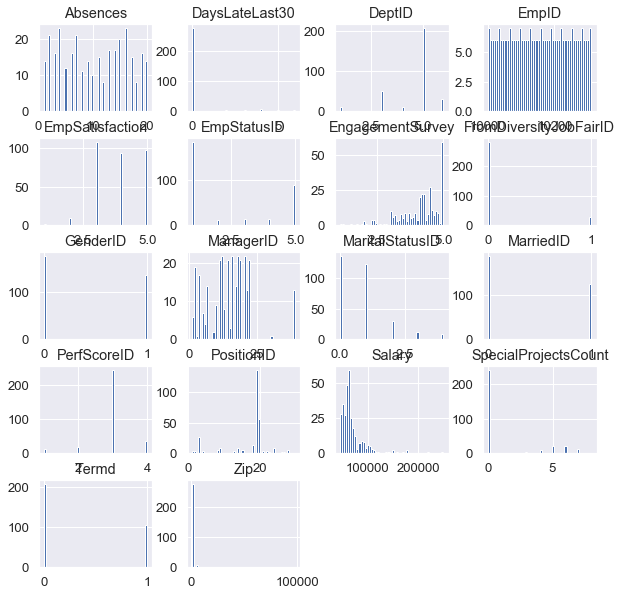

In [36]:
df.hist(bins=50,figsize=(10,10))

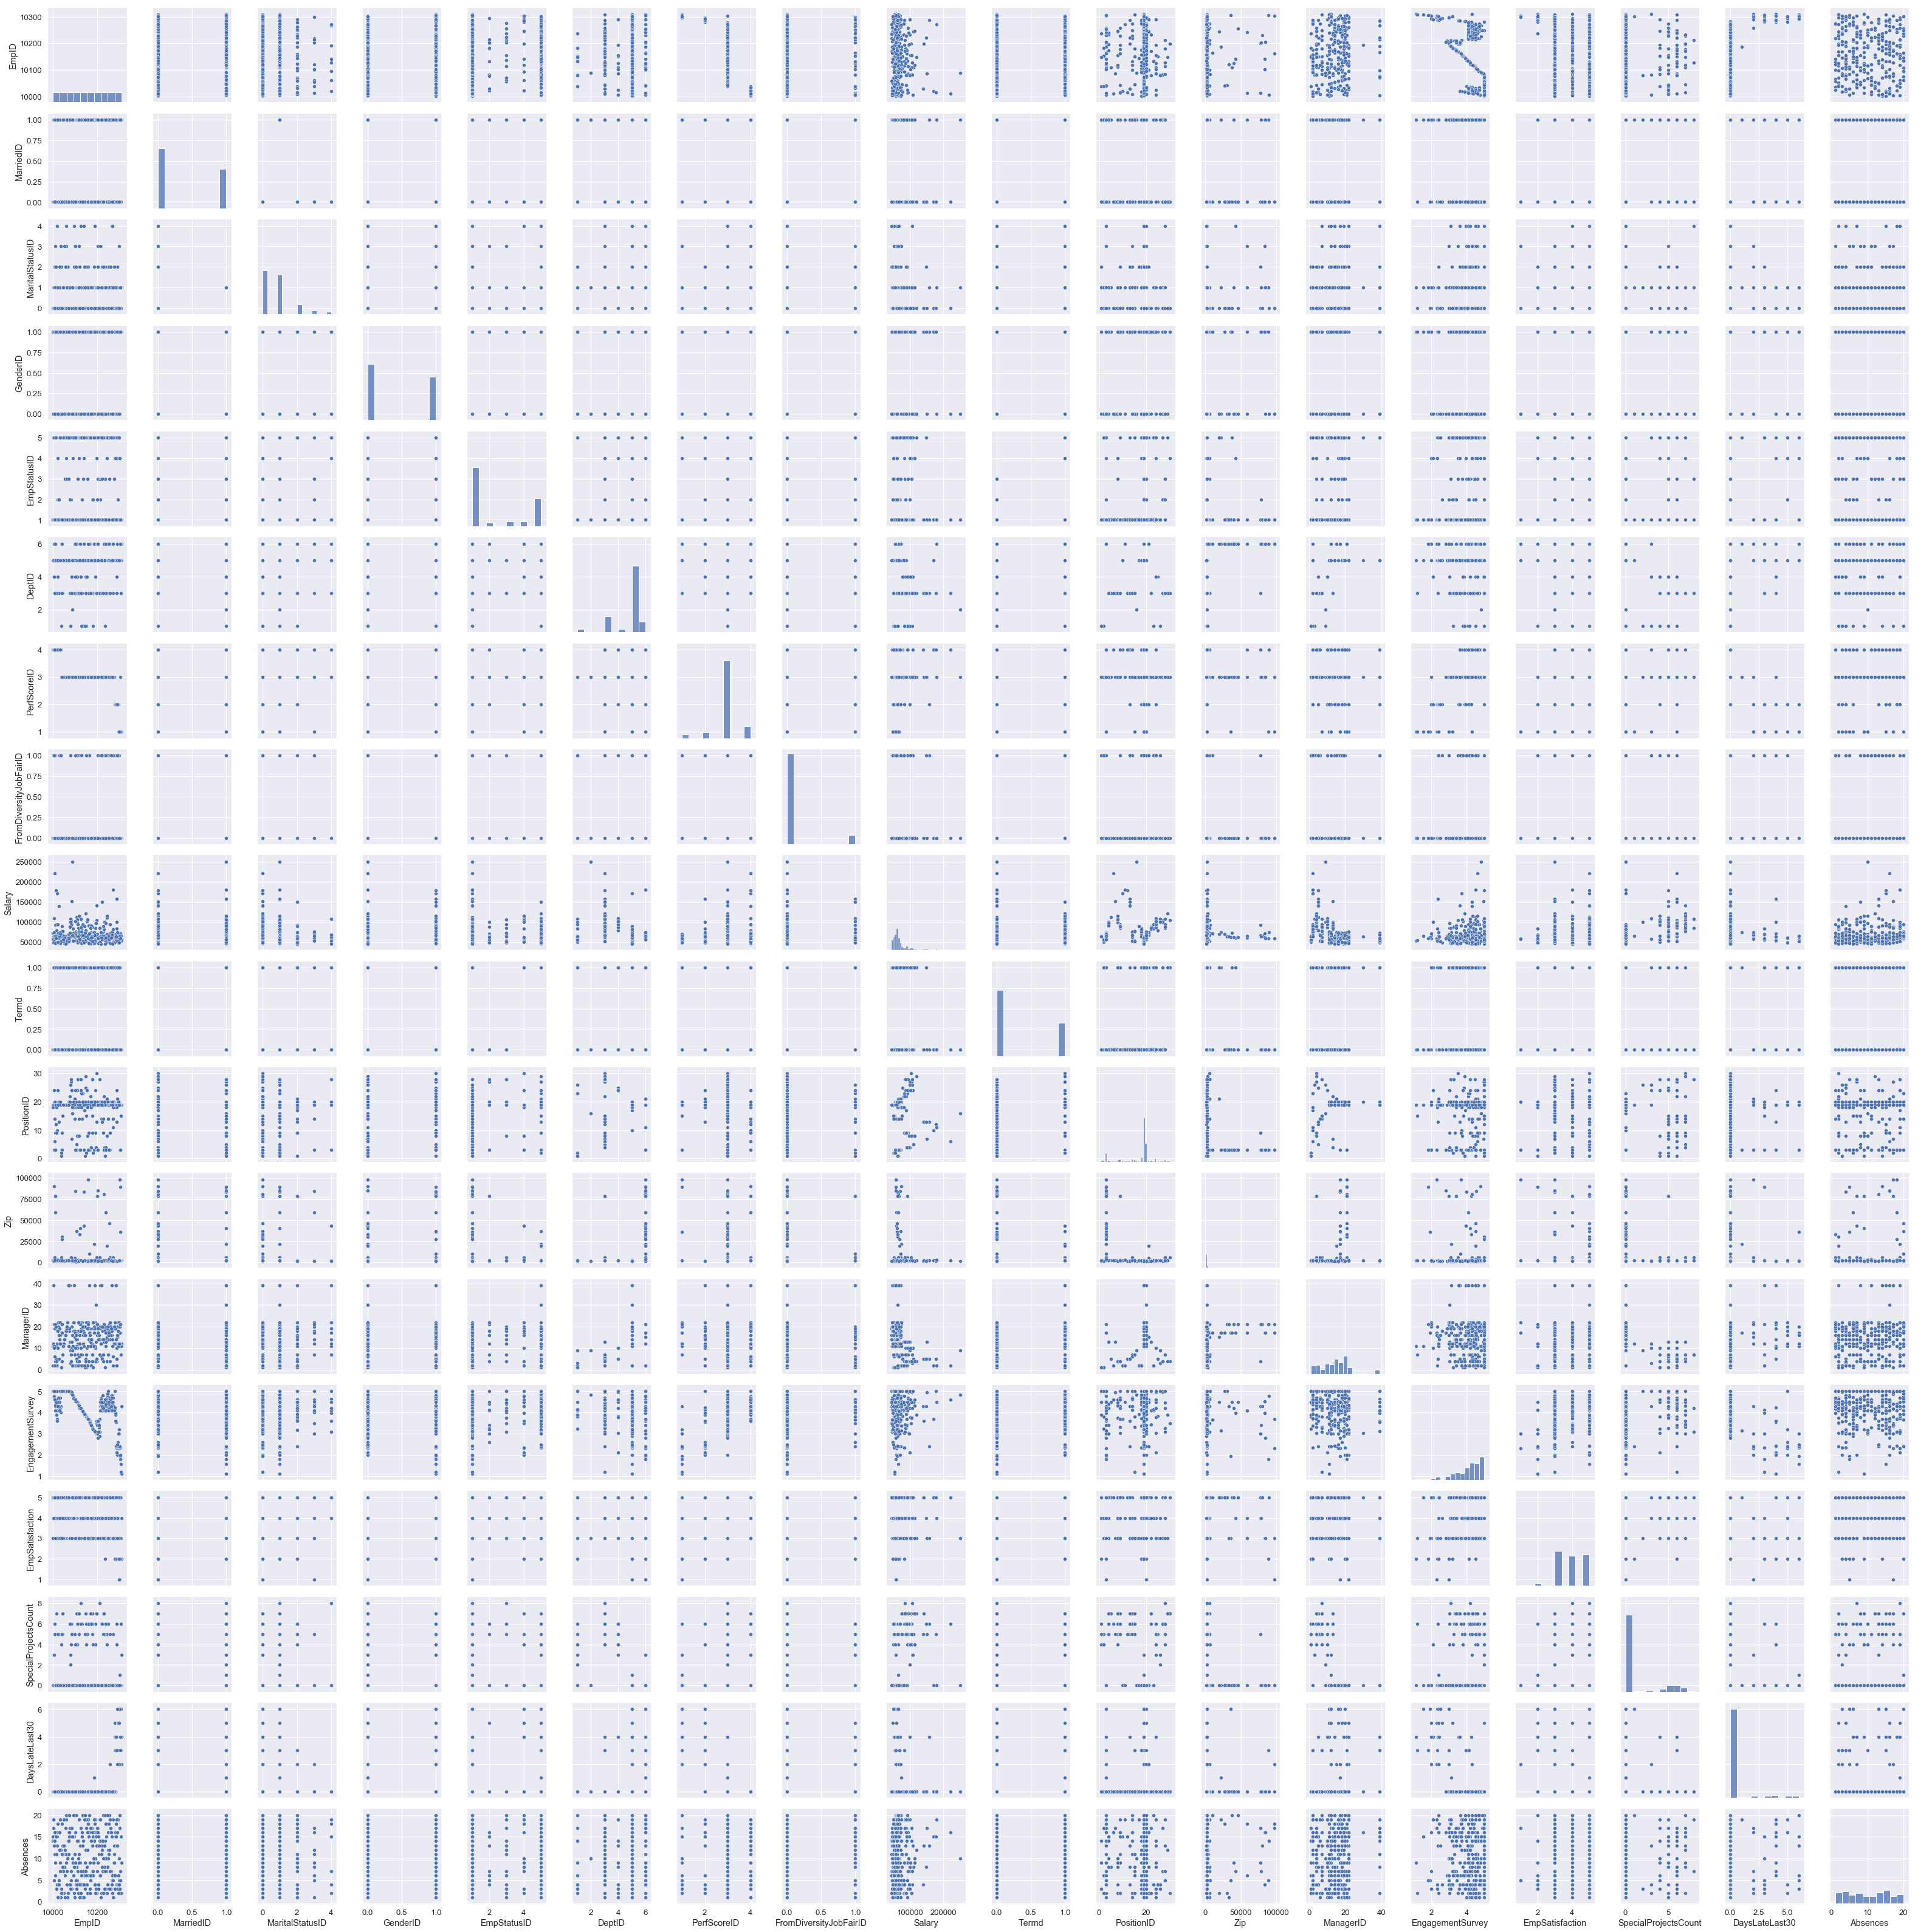

In [37]:
sns.pairplot(df)

In [38]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

How is PerformanceScore distributed in the dataset ?

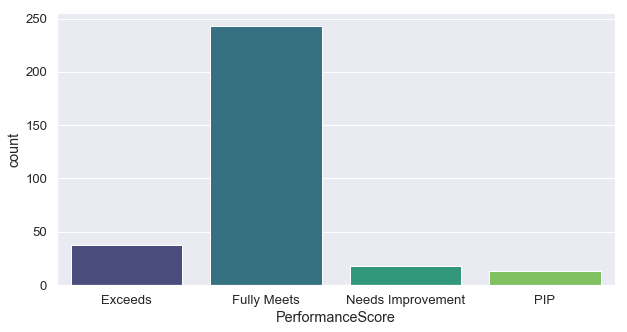

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df, palette='viridis')

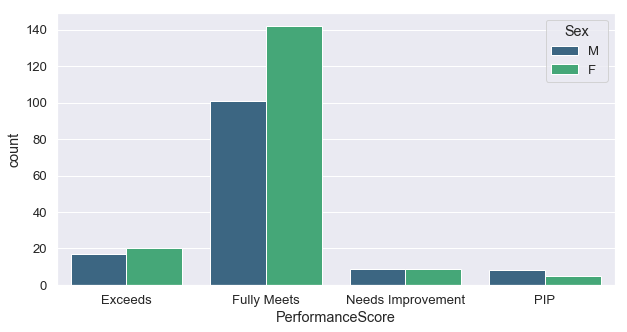

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df, hue = 'Sex', palette='viridis')

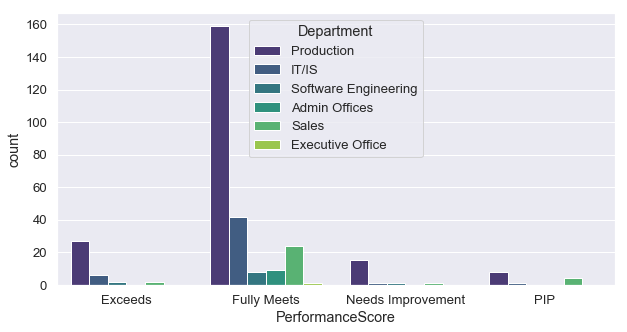

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df, hue = 'Department', palette='viridis')

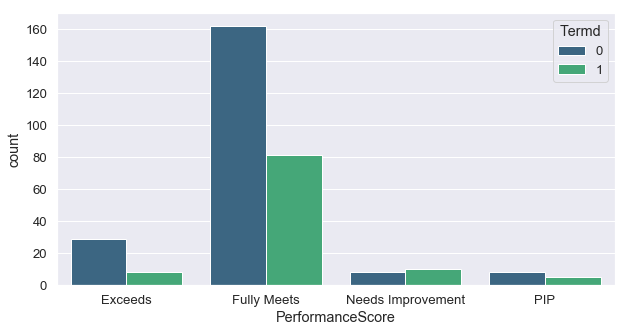

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df, hue = 'Termd', palette='viridis')

* Social Data

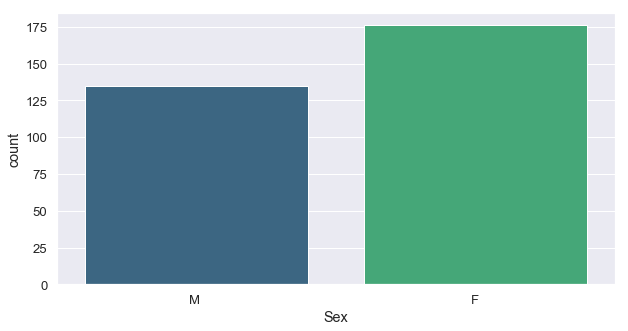

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, palette='viridis')

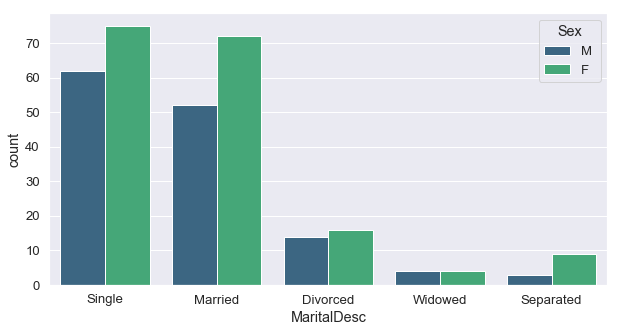

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalDesc', data=df, hue = 'Sex', palette='viridis')

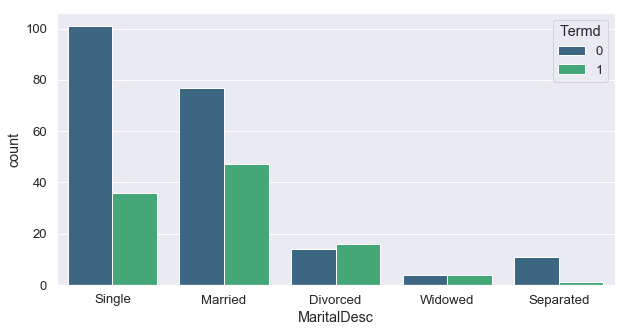

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalDesc', data=df, hue = 'Termd', palette='viridis')

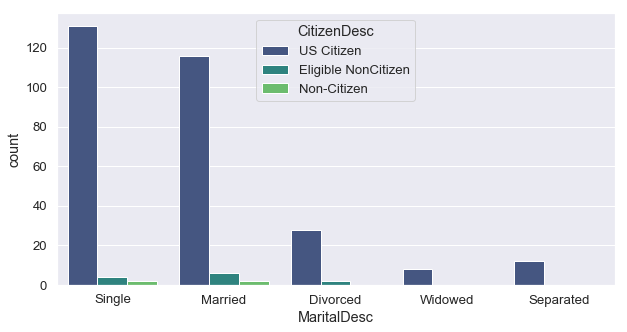

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalDesc', data=df, hue = 'CitizenDesc', palette='viridis')

<Figure size 1440x1440 with 0 Axes>

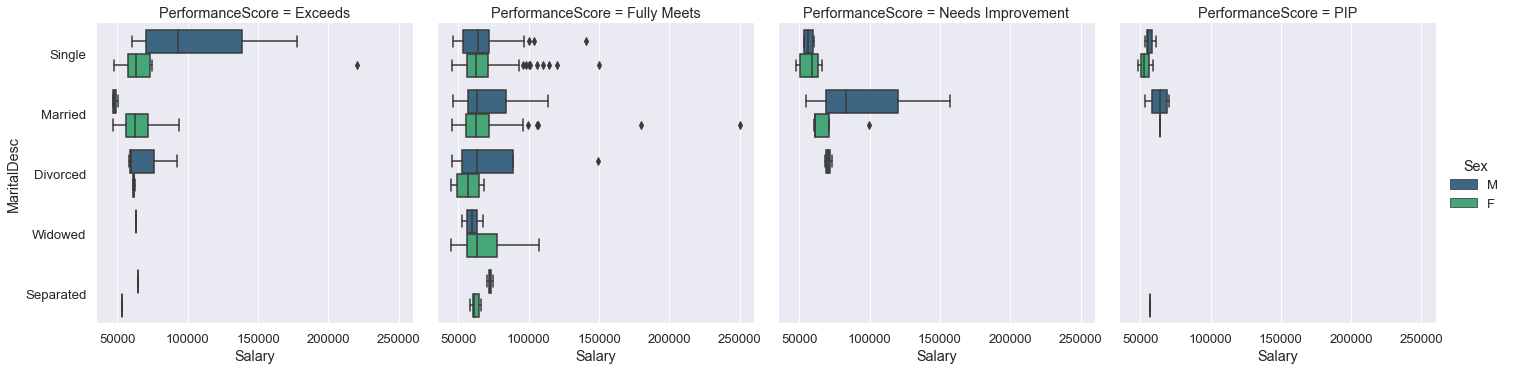

In [47]:
plt.figure(figsize=(20,20))
sns.catplot(kind='box', x='Salary', y='MaritalDesc', data=df, palette='viridis',  col='PerformanceScore', hue='Sex')

* Department Data

In [48]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [49]:
perfs = ['Exceeds', 'Needs Improvement', 'PIP', 'Fully Meets']
dps = ['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Executive Office', 'Sales']
palette1 ={"IT/IS": "C0", "Production       ": "C1", "Software Engineering": "C2", "Admin Offices":"C3", "Sales": "C4", "Executive Office":"C5"}
palette2 ={"Exceeds": "C0", "Needs Improvement": "C1", "PIP": "C2", "Fully Meets":"C3"}

The histogram below allows us to see the conditional probability of Department given Perfomance Score. It's a way to grasp the overall performance of the company but knowing the fact the production department is much bigger than other departments, we can do better taking the performance score given the department.

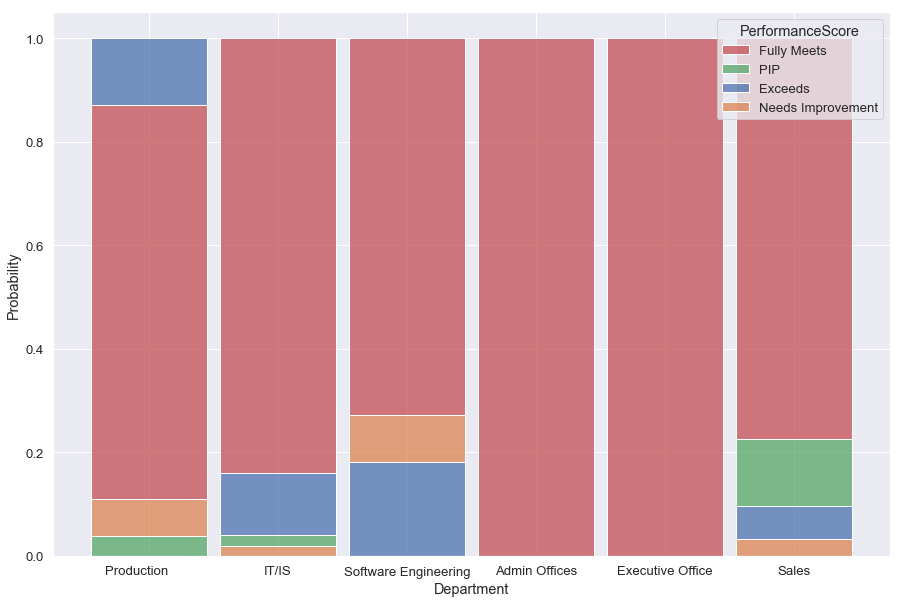

In [50]:
plt.figure(figsize=(15, 10))
for dp in dps:
    sns.histplot(x='Department', hue='PerformanceScore', multiple='stack', shrink=.9, stat='probability',palette=palette2, data=df[df['Department']==dp])

The sales department needs to be watched since it's the department which requires the most performance improvement plan (PIP). These have been set to address failures to meet specific job goals or to ameliorate behavior-related concerns.

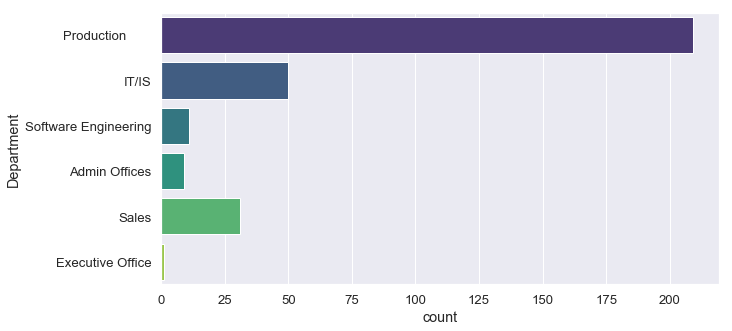

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, palette='viridis')

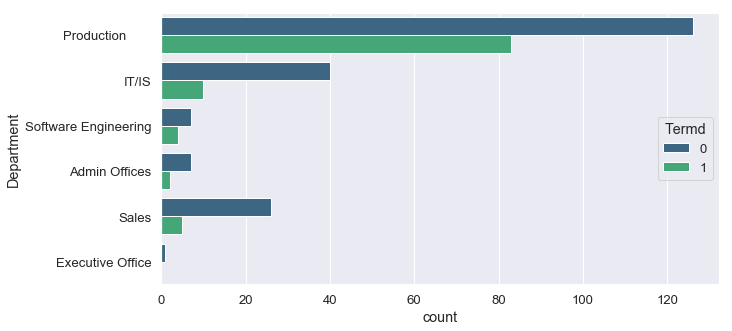

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue= 'Termd', palette='viridis')

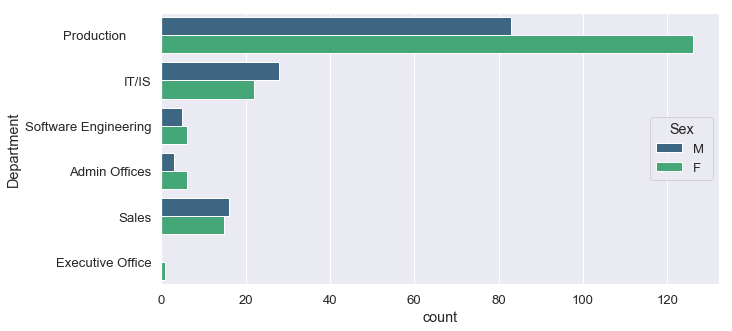

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue= 'Sex',  palette='viridis')

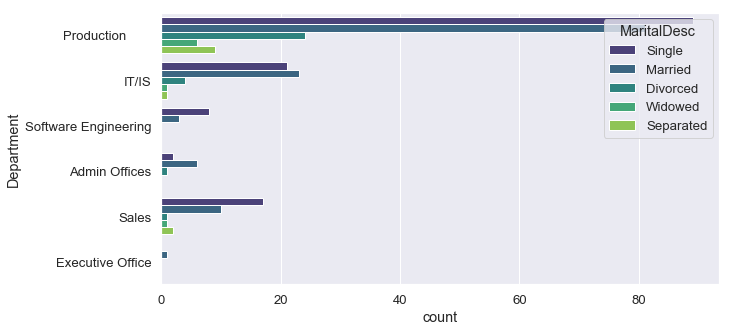

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'MaritalDesc',  palette='viridis')

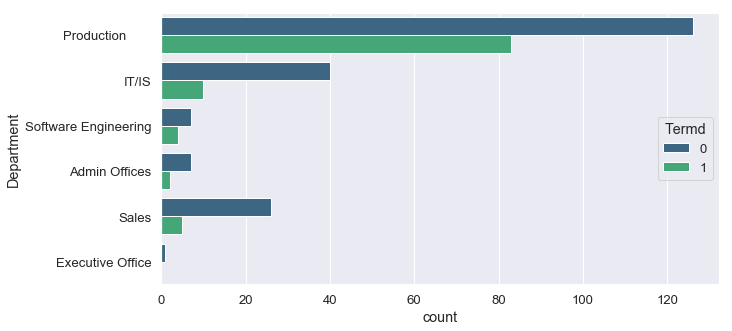

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'Termd',  palette='viridis')

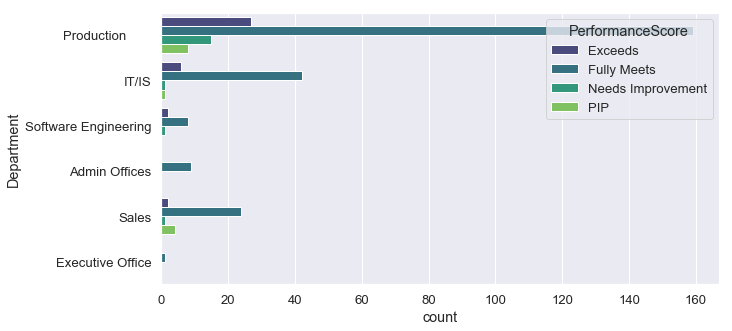

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'PerformanceScore',  palette='viridis')

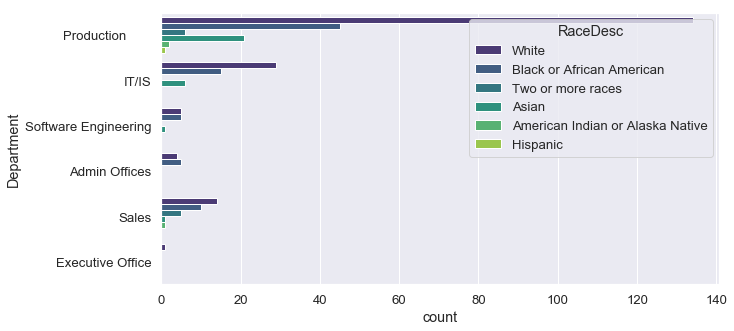

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'RaceDesc',  palette='viridis')

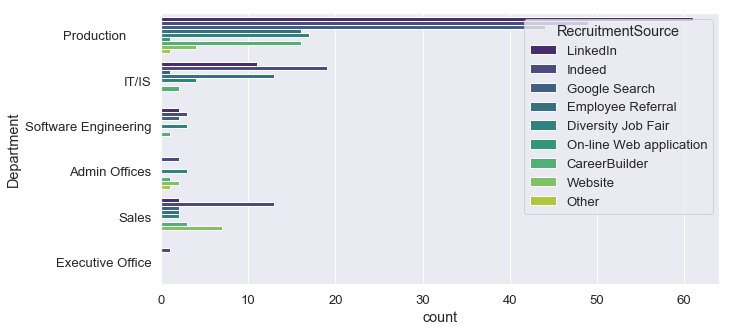

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'RecruitmentSource',  palette='viridis')

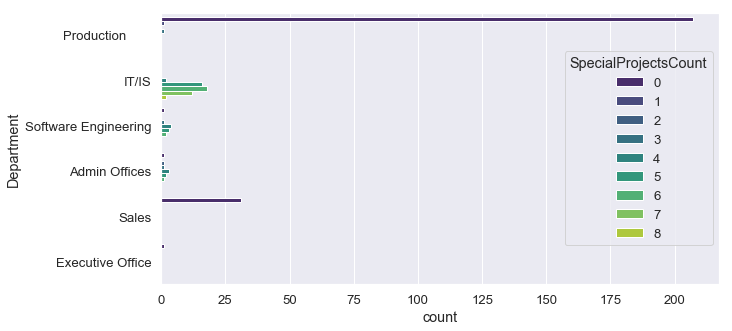

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue = 'SpecialProjectsCount',  palette='viridis')

It's also interesting to see the distribution of salaries between individuals having different performance scores and differents Department supervising them :

<Figure size 1440x1440 with 0 Axes>

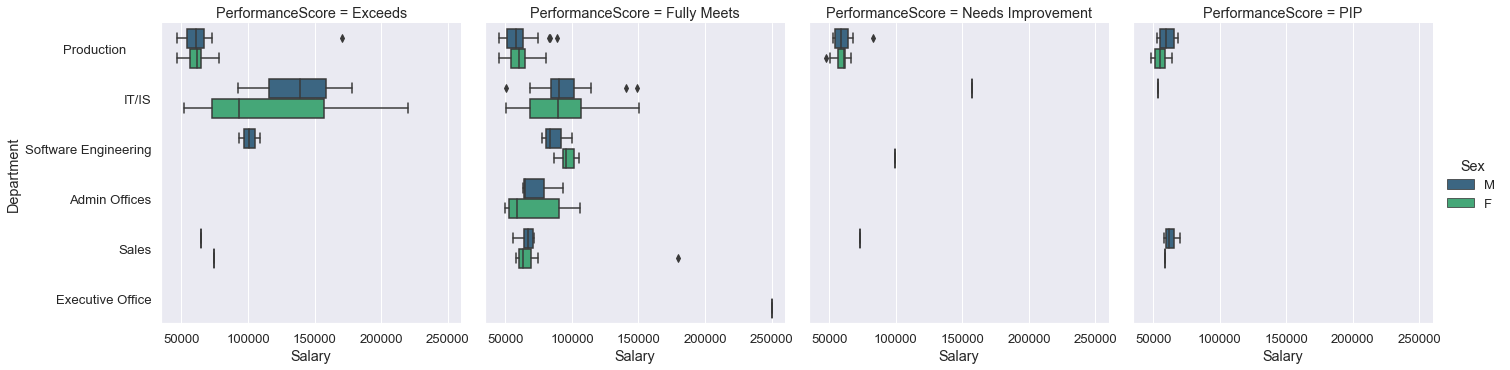

In [60]:
plt.figure(figsize=(20,20))
sns.catplot(kind='box', x='Salary', y='Department', data=df, palette='viridis',  col='PerformanceScore', hue='Sex')

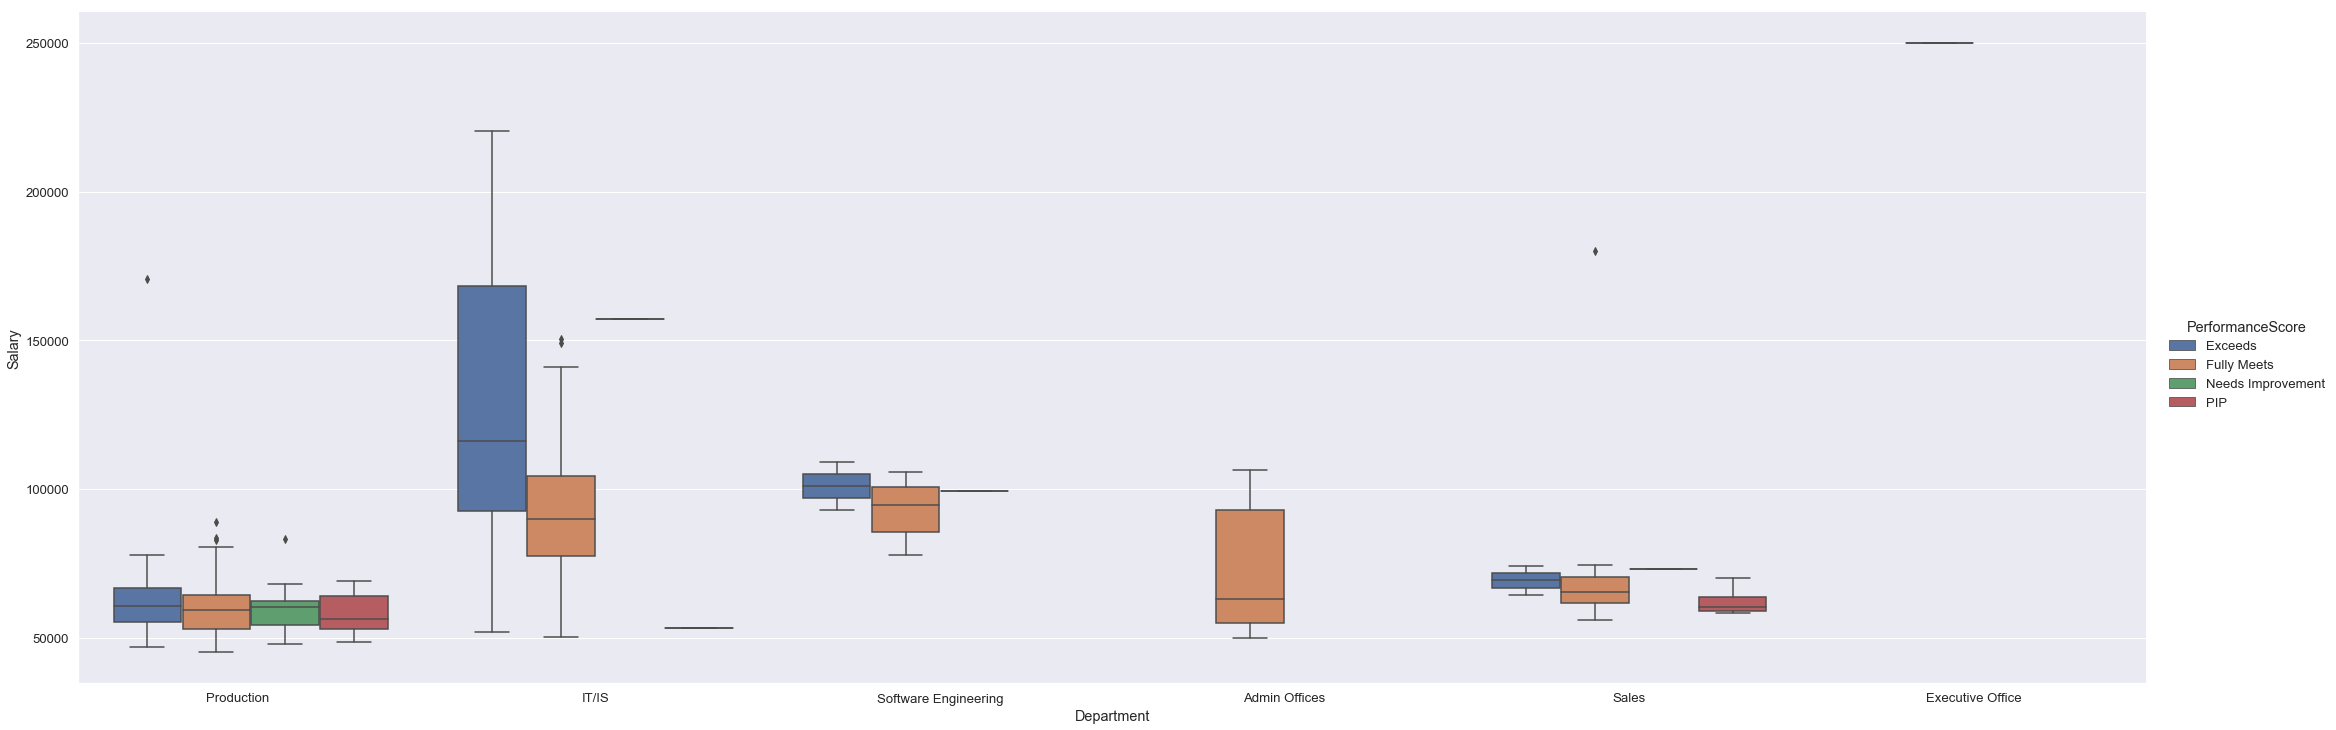

In [61]:
sns.catplot(x='Department', y='Salary', hue='PerformanceScore', kind='box', data=df, height=10, aspect=3)

* Position Data

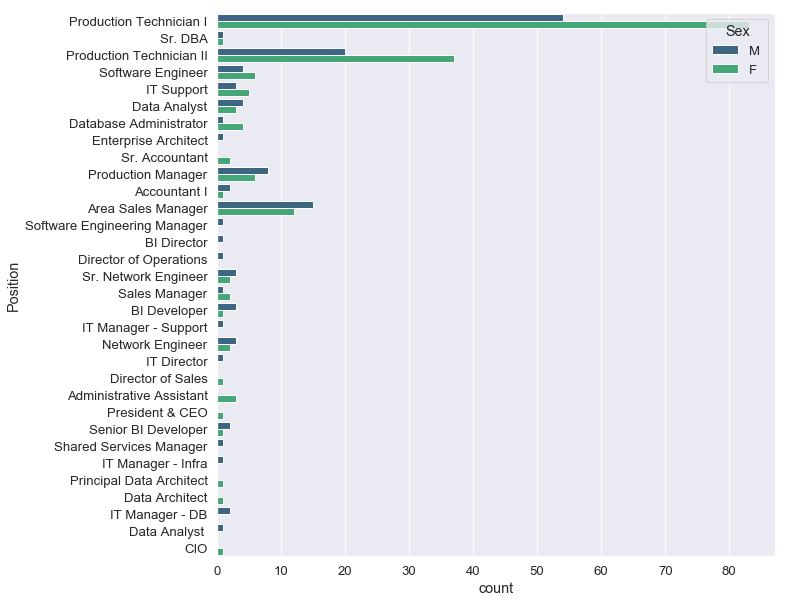

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'Sex', palette='viridis')

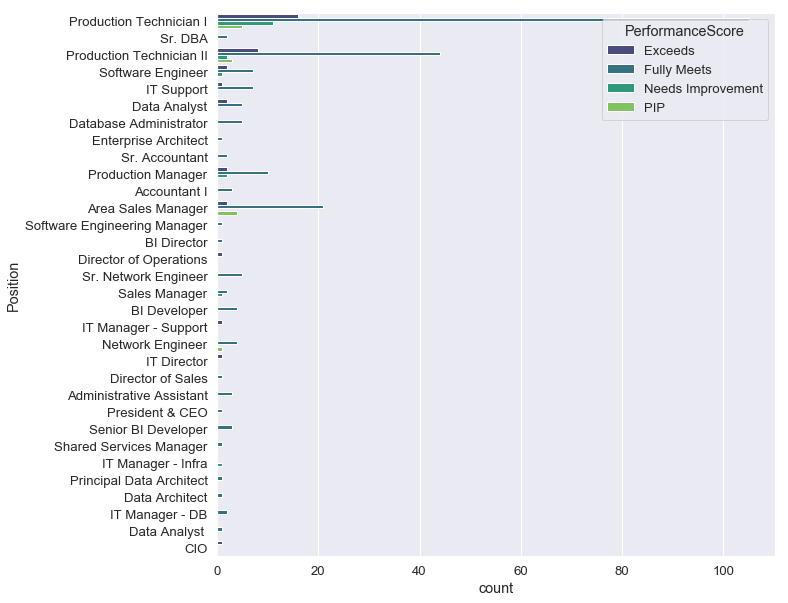

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'PerformanceScore', palette='viridis')

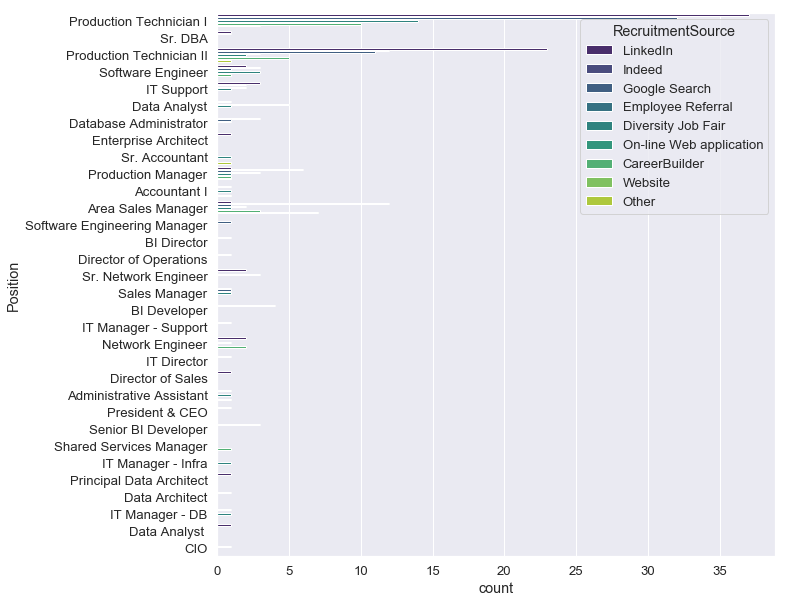

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'RecruitmentSource', palette='viridis')

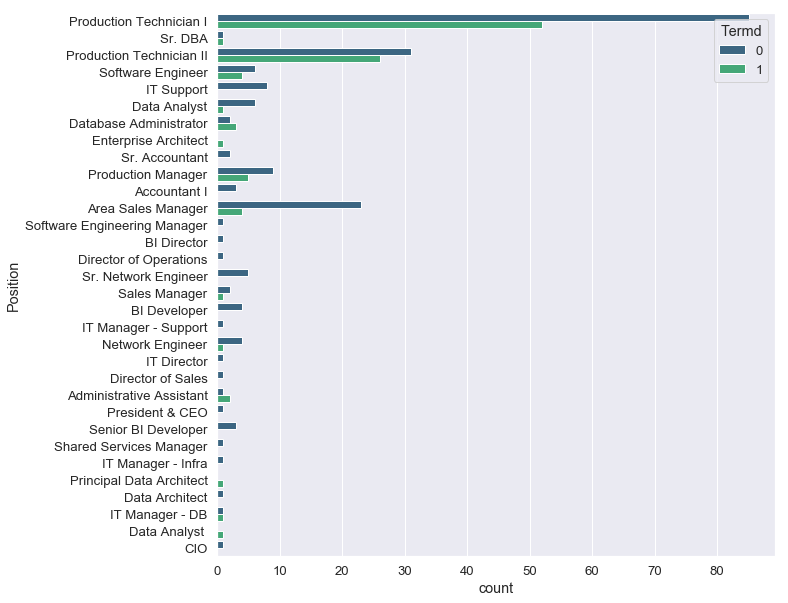

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'Termd', palette='viridis')

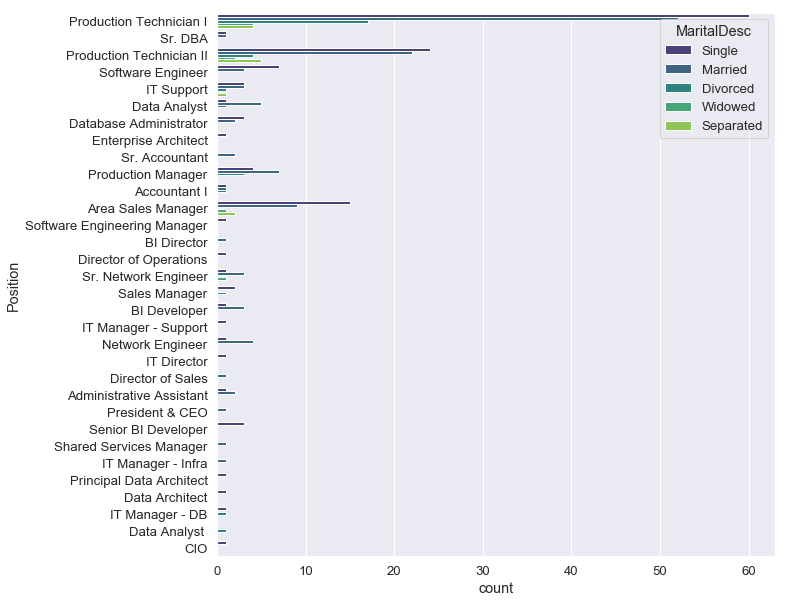

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(y='Position', data=df,  hue = 'MaritalDesc', palette='viridis')

How many managers are there in the company ?

In [67]:
print(len(df['ManagerName'].unique()), "unique managers are currently working in the company :", df['ManagerName'].unique())

21 unique managers are currently working in the company : ['Michael Albert' 'Simon Roup' 'Kissy Sullivan' 'Elijiah Gray'
 'Webster Butler' 'Amy Dunn' 'Alex Sweetwater' 'Ketsia Liebig'
 'Brannon Miller' 'Peter Monroe' 'David Stanley' 'Kelley Spirea'
 'Brandon R. LeBlanc' 'Janet King' 'John Smith' 'Jennifer Zamora'
 'Lynn Daneault' 'Eric Dougall' 'Debra Houlihan' 'Brian Champaigne'
 'Board of Directors']


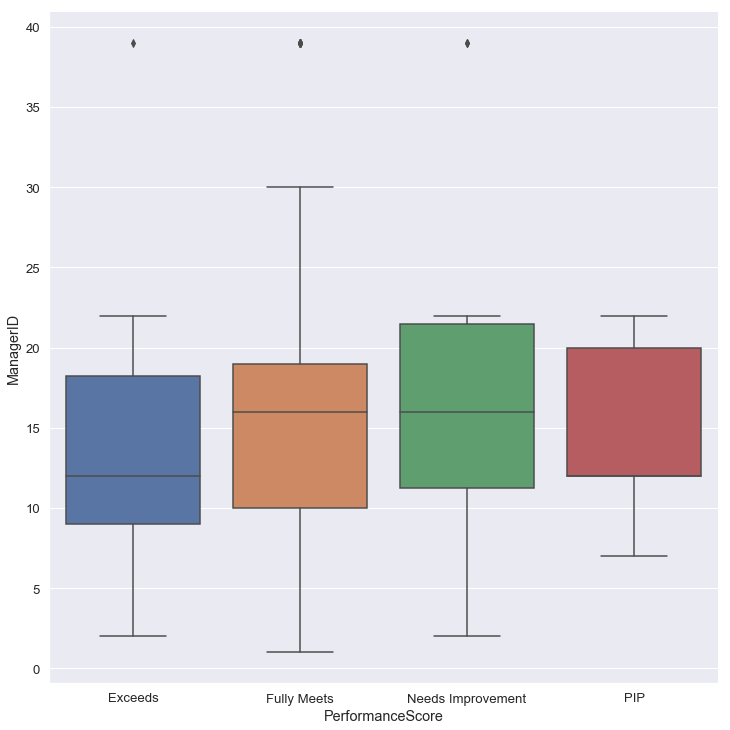

In [68]:
sns.catplot(y='ManagerID', x='PerformanceScore', kind='box', data=df, height=10, aspect=1)

Which managers supervise the most in the company ?

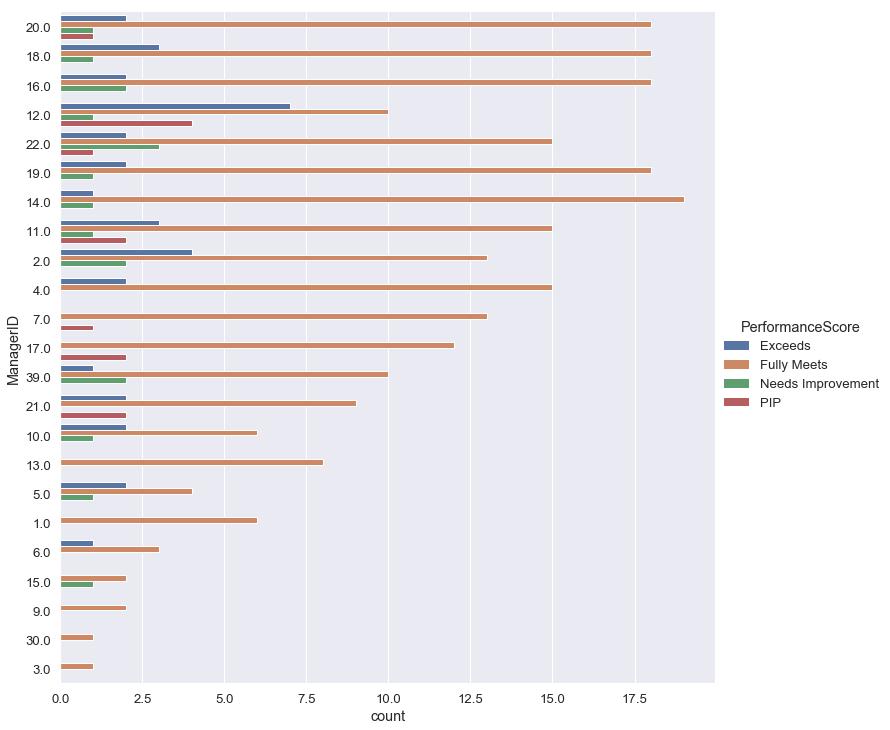

In [69]:
ManagersIds = df.groupby('ManagerID')['PerformanceScore'].count().sort_values(ascending=False).index
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df, order=ManagersIds,  height=10, aspect=1)

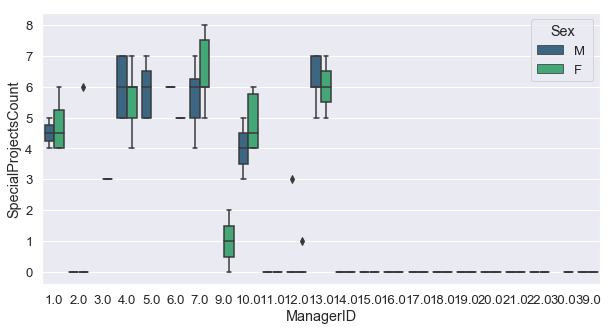

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ManagerID", y="SpecialProjectsCount", hue="Sex",data=df, palette='viridis')

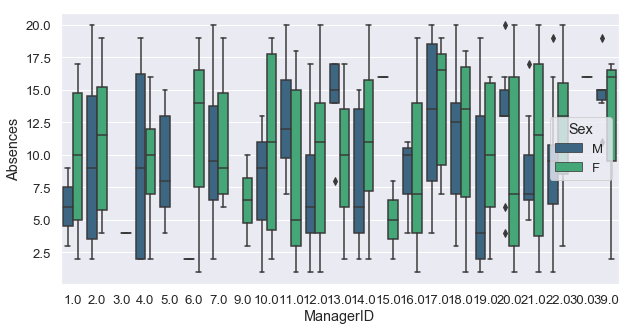

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ManagerID", y="Absences", hue="Sex",data=df, palette='viridis')

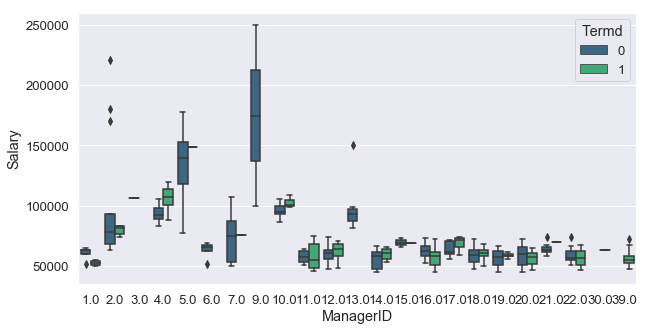

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ManagerID", y="Salary", hue="Termd",data=df, palette='viridis')

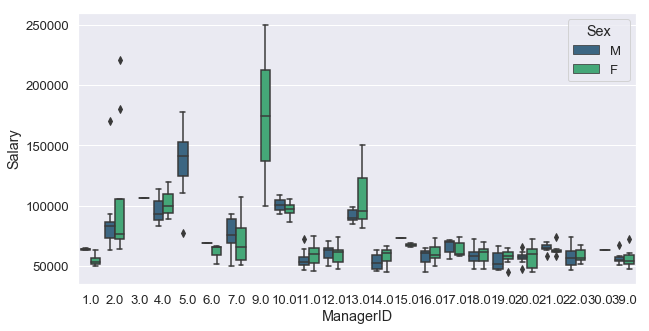

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ManagerID", y="Salary", hue="Sex",data=df, palette='viridis')

It's also interesting to see the distribution of salaries between individuals having different performance scores and differents managers supervising them :

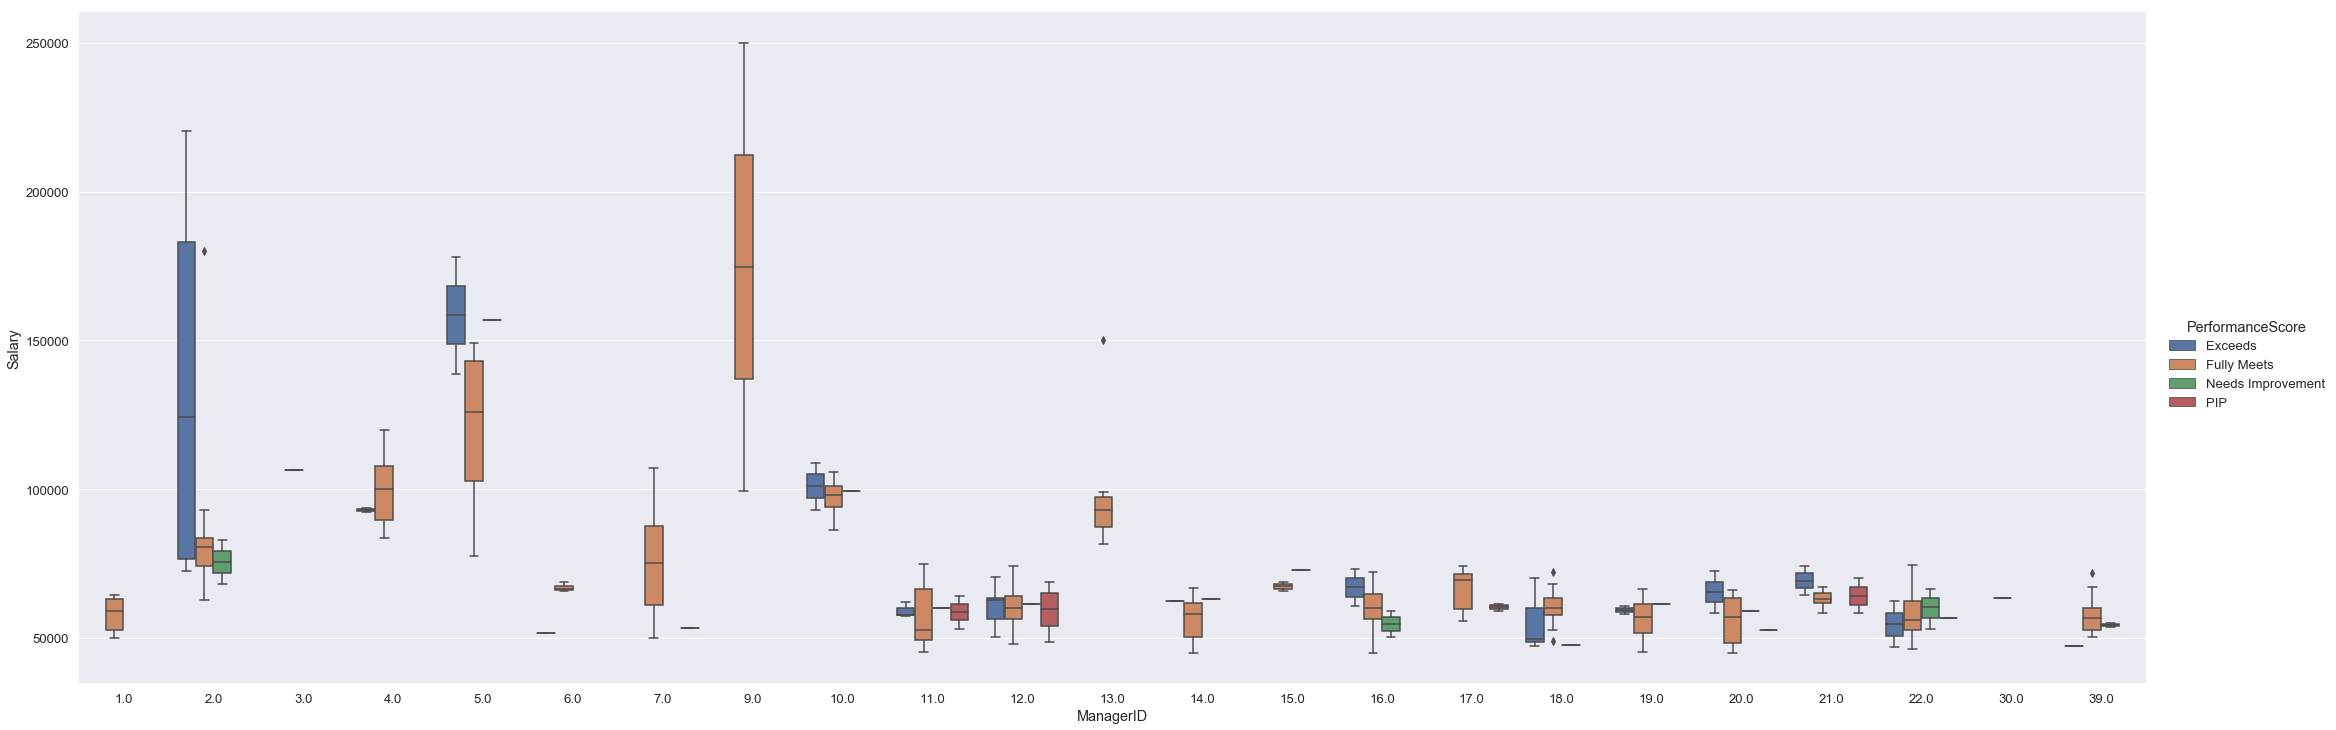

In [74]:
sns.catplot(x='ManagerID', y='Salary', hue='PerformanceScore', kind='box', data=df, height=10, aspect=3)

What is the overall diversity profile of the organization ?

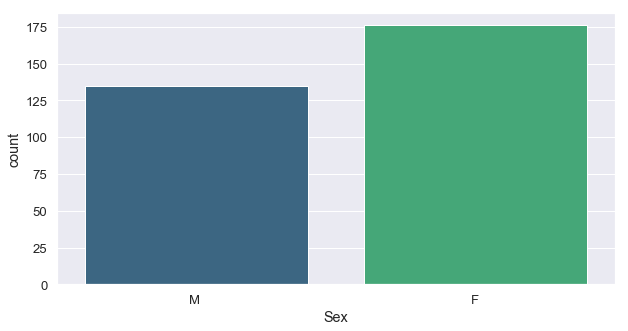

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, palette='viridis')

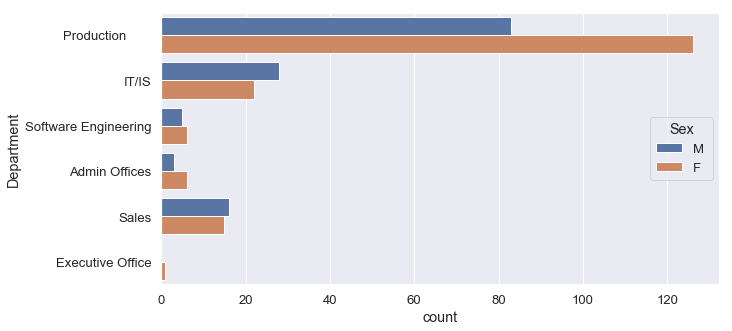

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Department'], hue=df['Sex'])

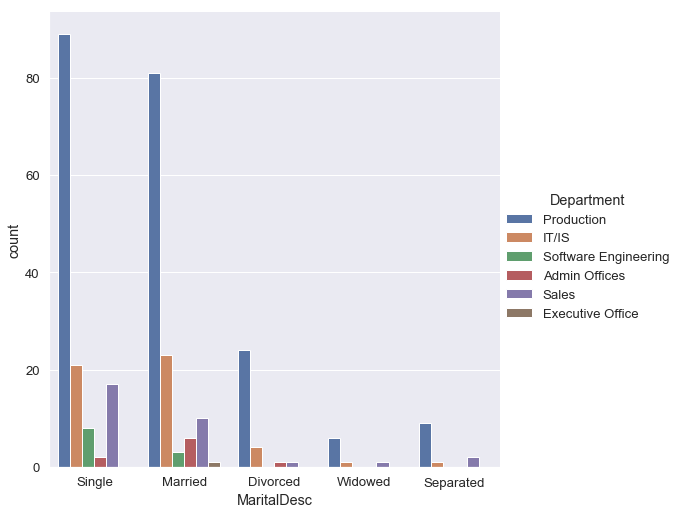

In [77]:
sns.catplot(x='MaritalDesc', hue='Department', data=df, kind="count",height=7, aspect=1)

<Figure size 720x360 with 0 Axes>

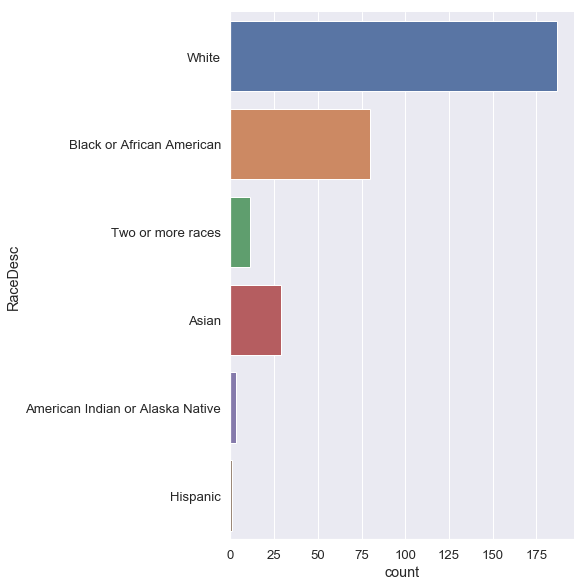

In [78]:
plt.figure(figsize=(10,5))
sns.catplot(y='RaceDesc', data=df, kind='count', height=8, aspect=1)

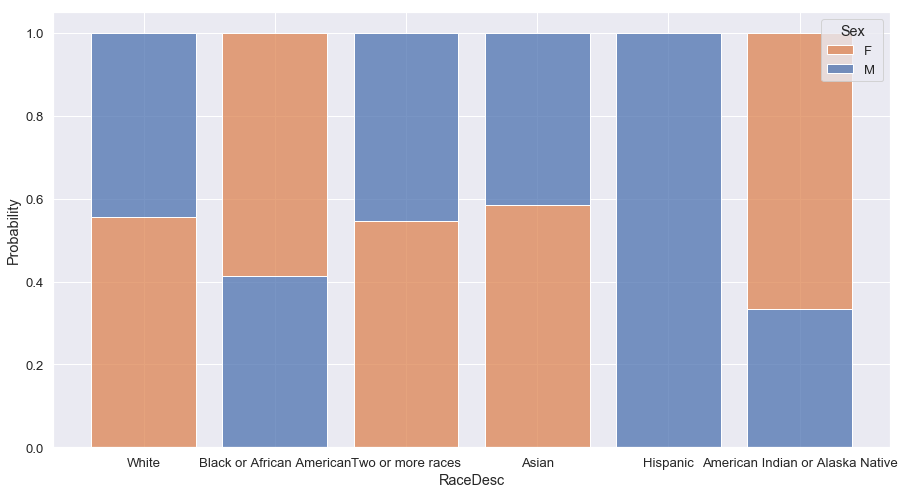

In [79]:
palette1 ={"M ": "C0", "F": "C1"}
races = ['White', 'Black or African American', 'Two or more races', 'Asian', 'Hispanic', 'American Indian or Alaska Native']
palette2 ={'White':"C0", 'Black or African American':"C1", 'Two or more races':"C2", 'Asian':"C3", 'Hispanic':"C4", 'American Indian or Alaska Native':"C5"}
plt.figure(figsize=(15, 8))
for r in races:
    sns.histplot(x='RaceDesc', hue="Sex", multiple="stack", data=df[df['RaceDesc']==r], palette=palette1, stat='probability', shrink=.8)

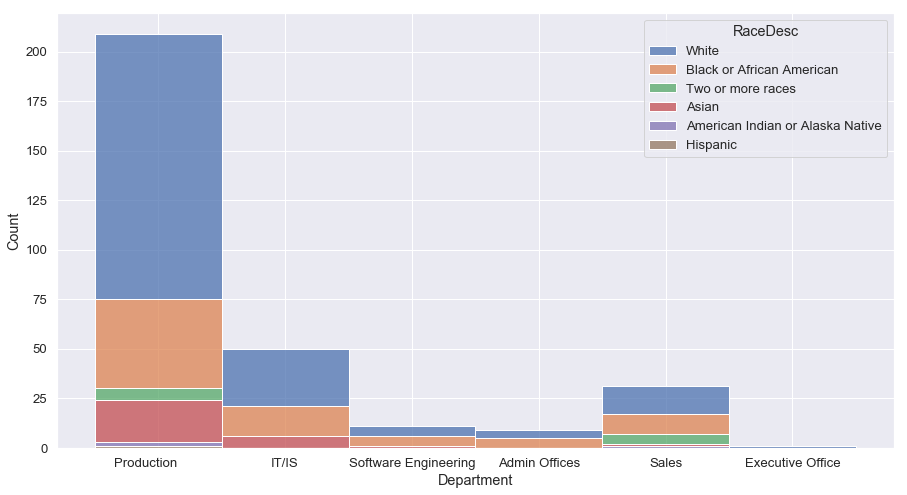

In [80]:
plt.figure(figsize=(15, 8))
sns.histplot(x='Department', hue='RaceDesc', multiple='stack', data=df)

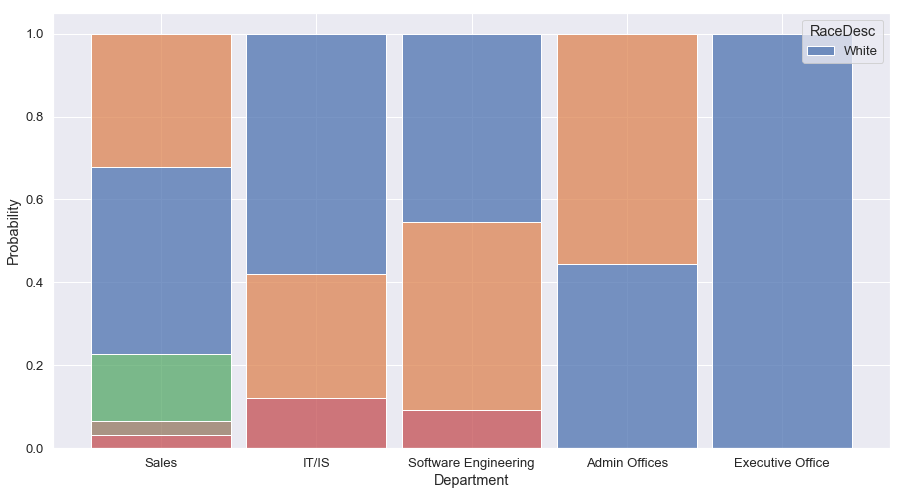

In [81]:
dps = ['Sales', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Executive Office','Production']
plt.figure(figsize=(15, 8))
for d in dps:
    sns.histplot(x='Department', hue='RaceDesc', palette=palette2, stat='probability', multiple='stack', shrink=0.9, data=df[df['Department']==d])

What are our best recruiting sources if we want to ensure a diverse organization ?

In [82]:
df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

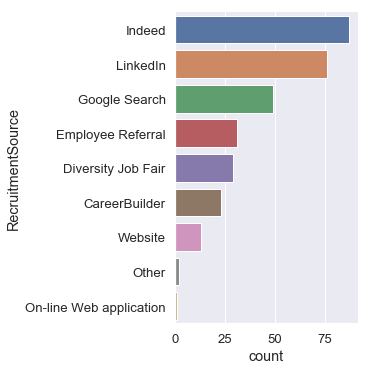

In [83]:
sns.catplot(y='RecruitmentSource', kind='count', order=df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).index, data=df)

Are there areas of the company where pay is not equitable ?

distribution of salaries in the company

C:\Users\Khaled\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


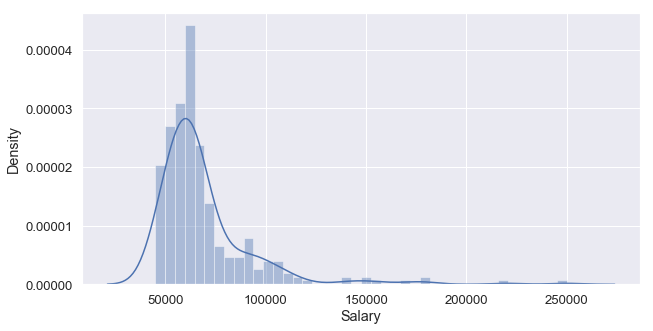

In [84]:
plt.figure(figsize=(10,5))
sns.distplot(df['Salary'])

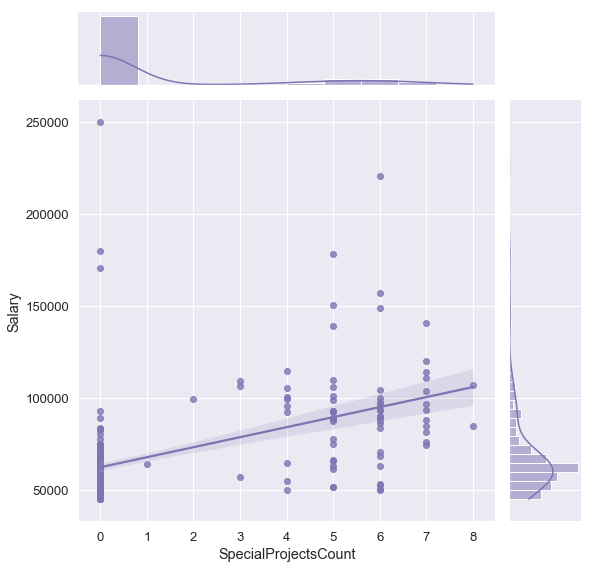

In [85]:
sns.jointplot(x='SpecialProjectsCount', y='Salary', data=df, kind='reg', height=8, color='m')

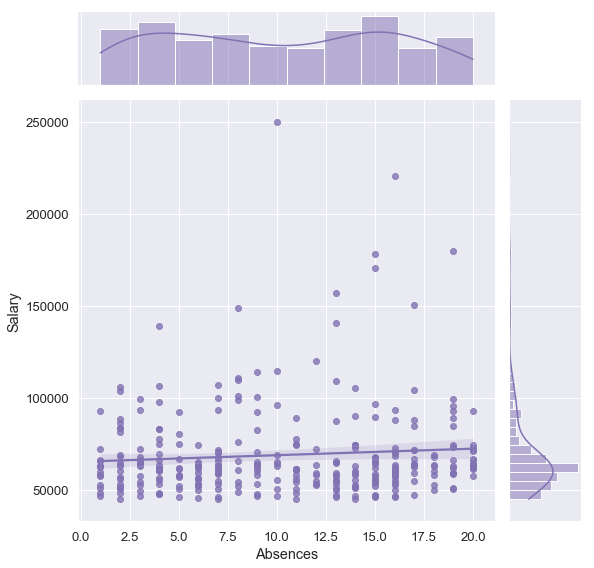

In [86]:
sns.jointplot(x='Absences', y='Salary', data=df, kind='reg', height=8, color='m')

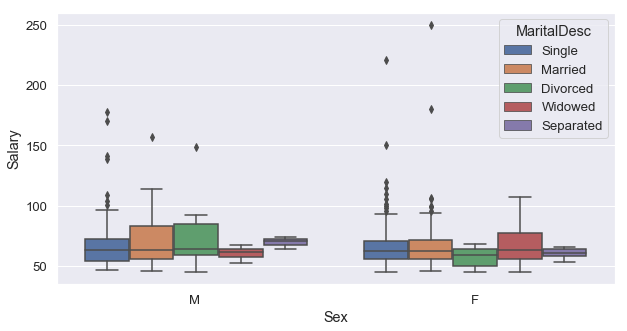

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sex'], y=df['Salary']/1000, hue=df['MaritalDesc'])

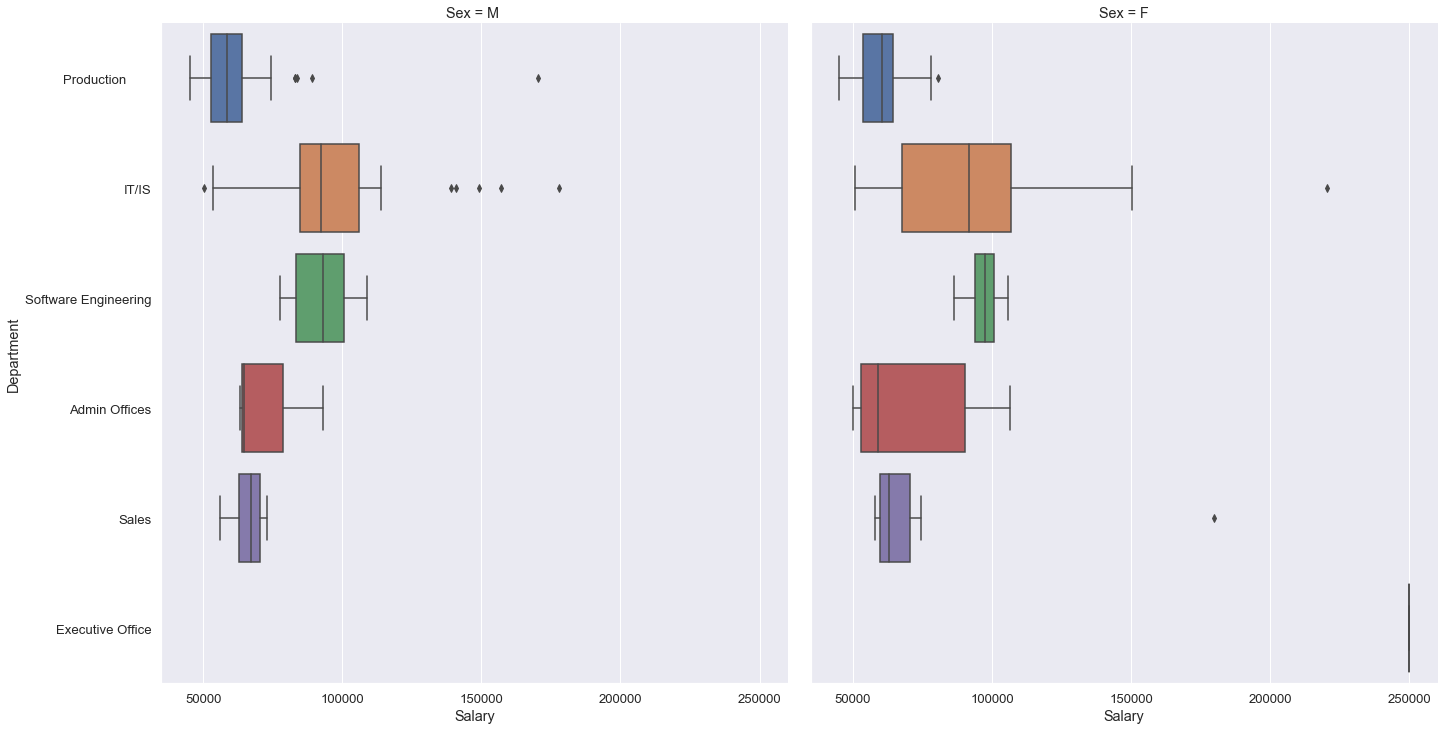

In [88]:
sns.catplot(y='Department', x='Salary', col='Sex', data=df, kind="box", height = 10, aspect = 1)

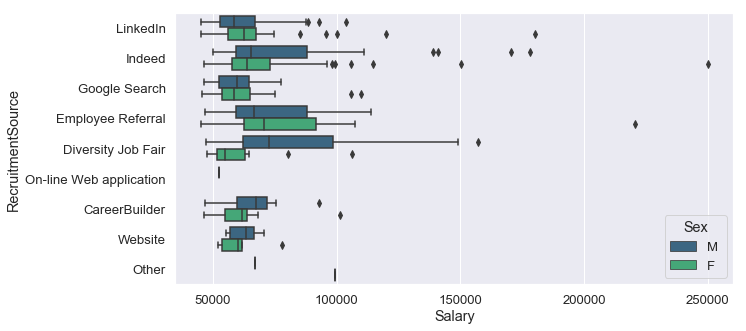

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(y="RecruitmentSource", x="Salary", hue="Sex",data=df, palette='viridis')

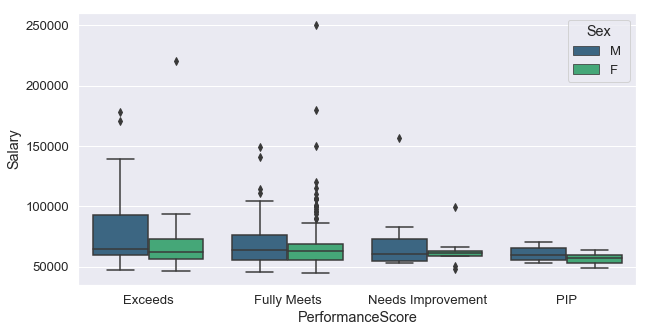

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(x="PerformanceScore", y="Salary", hue="Sex",data=df, palette='viridis')

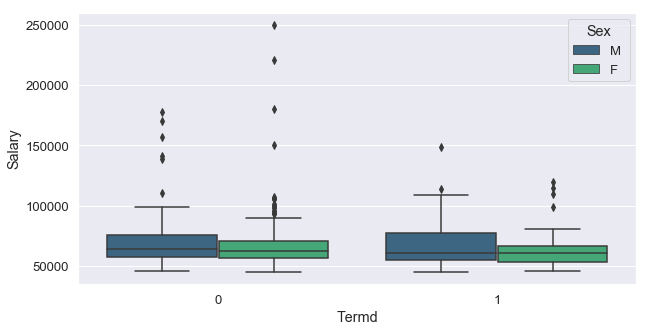

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Termd", y="Salary", hue="Sex",data=df, palette='viridis')

In [92]:
df['HispanicLatino'].value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

In [93]:
df['HispanicLatino'].replace("Yes",1,inplace=True)
df['HispanicLatino'].replace("yes",1,inplace=True)
df['HispanicLatino'].replace("No",0,inplace=True)
df['HispanicLatino'].replace("no",0,inplace=True)

In [94]:
df['HispanicLatino'].value_counts()

0    283
1     28
Name: HispanicLatino, dtype: int64

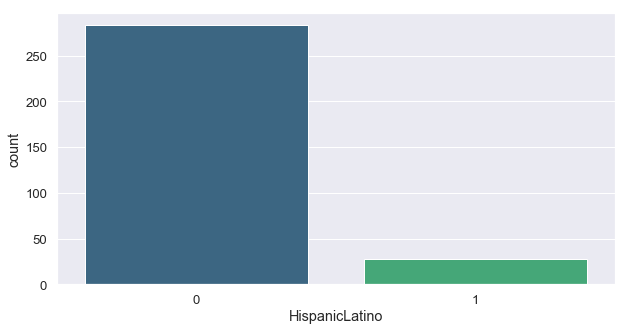

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='HispanicLatino', data=df, palette='viridis')

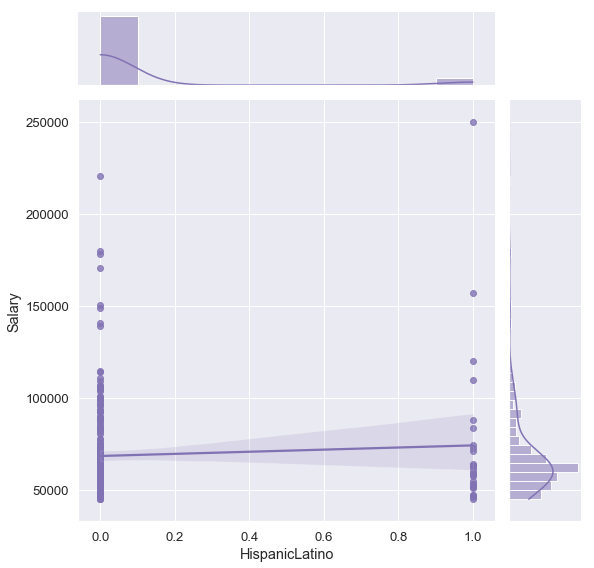

In [96]:
sns.jointplot(x='HispanicLatino', y='Salary', data=df, kind='reg', height=8, color='m')

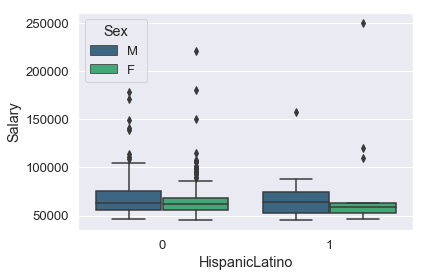

In [97]:
sns.boxplot(x="HispanicLatino", y="Salary", hue="Sex",data=df, palette='viridis')

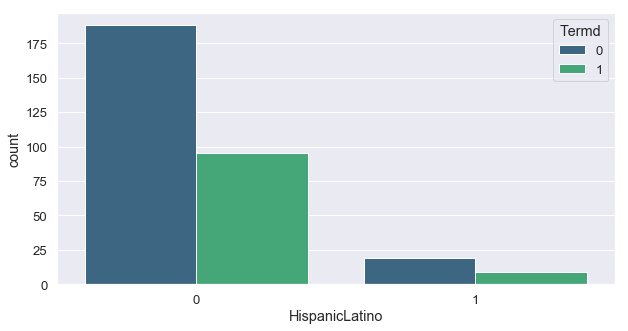

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(x='HispanicLatino', data=df, hue = 'Termd', palette='viridis')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
Employee_Name                 311 non-null object
EmpID                         311 non-null int64
MarriedID                     311 non-null int64
MaritalStatusID               311 non-null int64
GenderID                      311 non-null int64
EmpStatusID                   311 non-null int64
DeptID                        311 non-null int64
PerfScoreID                   311 non-null int64
FromDiversityJobFairID        311 non-null int64
Salary                        311 non-null int64
Termd                         311 non-null int64
PositionID                    311 non-null int64
Position                      311 non-null object
State                         311 non-null object
Zip                           311 non-null int64
DOB                           311 non-null object
Sex                           311 non-null object
MaritalDesc                   311 non-null object
Citizen

 * Select the needed columns

In [100]:
df_select = df[['MaritalDesc','Sex', 'EmploymentStatus', 'Department', 'PerformanceScore',  'Position', 'CitizenDesc', 'HispanicLatino',
          'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction', 'SpecialProjectsCount','Salary', 'DaysLateLast30', 'Absences', 'Termd']]

In [101]:
df_select.head()

,MaritalDesc,Sex,EmploymentStatus,Department,PerformanceScore,Position,CitizenDesc,HispanicLatino,RaceDesc,ManagerName,RecruitmentSource,EmpSatisfaction,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd
0,Single,M,Active,Production,Exceeds,Production Technician I,US Citizen,0,White,Michael Albert,LinkedIn,5,0,62506,0,1,0
1,Married,M,Voluntarily Terminated,IT/IS,Fully Meets,Sr. DBA,US Citizen,0,White,Simon Roup,Indeed,3,6,104437,0,17,1
2,Married,F,Voluntarily Terminated,Production,Fully Meets,Production Technician II,US Citizen,0,White,Kissy Sullivan,LinkedIn,3,0,64955,0,3,1
3,Married,F,Active,Production,Fully Meets,Production Technician I,US Citizen,0,White,Elijiah Gray,Indeed,5,0,64991,0,15,0
4,Divorced,F,Voluntarily Terminated,Production,Fully Meets,Production Technician I,US Citizen,0,White,Webster Butler,Google Search,4,0,50825,0,2,1


In [102]:
df_select.isnull().sum()

MaritalDesc             0
Sex                     0
EmploymentStatus        0
Department              0
PerformanceScore        0
Position                0
CitizenDesc             0
HispanicLatino          0
RaceDesc                0
ManagerName             0
RecruitmentSource       0
EmpSatisfaction         0
SpecialProjectsCount    0
Salary                  0
DaysLateLast30          0
Absences                0
Termd                   0
dtype: int64

In [103]:
df_select.columns[:-5]

Index(['MaritalDesc', 'Sex', 'EmploymentStatus', 'Department',
       'PerformanceScore', 'Position', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction'],
      dtype='object')

In [104]:
df_dummies = pd.get_dummies(df_select, columns=df_select.columns[:-5], drop_first=True)
df_dummies

,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,Sex_M,...,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,EmpSatisfaction_2,EmpSatisfaction_3,EmpSatisfaction_4,EmpSatisfaction_5
0,0,62506,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,6,104437,0,17,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,64955,0,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,64991,0,15,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,50825,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,57568,0,15,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6,4,95660,0,19,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0,59365,0,19,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8,0,47837,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,6,50178,0,16,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [105]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 91 columns):
SpecialProjectsCount                         311 non-null int64
Salary                                       311 non-null int64
DaysLateLast30                               311 non-null int64
Absences                                     311 non-null int64
Termd                                        311 non-null int64
MaritalDesc_Married                          311 non-null uint8
MaritalDesc_Separated                        311 non-null uint8
MaritalDesc_Single                           311 non-null uint8
MaritalDesc_Widowed                          311 non-null uint8
Sex_M                                        311 non-null uint8
EmploymentStatus_Terminated for Cause        311 non-null uint8
EmploymentStatus_Voluntarily Terminated      311 non-null uint8
Department_Executive Office                  311 non-null uint8
Department_IT/IS                             311 non-null uint8

In [106]:
x = df_dummies.drop('Termd', axis=1)
y = df_dummies['Termd']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [109]:
from imblearn.over_sampling import SMOTE

In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=22)
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [134]:
y_train

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [135]:
y_train.mean()

0.5

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [138]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(),
    "         Random Forest": RandomForestClassifier(n_estimators=500),
    "         XGBClassifier": XGBClassifier(n_estimators=700)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.


C:\Users\Khaled\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khaled\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


        Neural Network trained.
         Random Forest trained.
[06:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Khaled\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


         XGBClassifier trained.


In [139]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    

   K-Nearest Neighbors Accuracy: 63.49%
[[31 13]
 [10  9]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.41      0.47      0.44        19

   micro avg       0.63      0.63      0.63        63
   macro avg       0.58      0.59      0.58        63
weighted avg       0.65      0.63      0.64        63

   Logistic Regression Accuracy: 98.41%
[[43  1]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.95      1.00      0.97        19

   micro avg       0.98      0.98      0.98        63
   macro avg       0.97      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63

Support Vector Machine Accuracy: 96.83%
[[42  2]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.90      1.00      0.95        19

   mi

In [118]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [119]:
selector = SelectKBest(k=10, score_func=f_classif)

In [120]:
selector.fit(x_train, y_train)

C:\Users\Khaled\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [29 44 47] are constant.
  UserWarning)
C:\Users\Khaled\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=10, score_func=<function f_classif at 0x000002247689C9D8>)

In [121]:
selector.get_support(indices=True)

array([ 2,  6,  9, 10, 16, 75, 79, 81, 82, 87], dtype=int64)

In [122]:
x.columns[selector.get_support(indices=True)]

Index(['DaysLateLast30', 'MaritalDesc_Single',
       'EmploymentStatus_Terminated for Cause',
       'EmploymentStatus_Voluntarily Terminated',
       'PerformanceScore_Fully Meets', 'ManagerName_Peter Monroe',
       'RecruitmentSource_Employee Referral', 'RecruitmentSource_Indeed',
       'RecruitmentSource_LinkedIn', 'EmpSatisfaction_3'],
      dtype='object')

In [123]:
Select_columns = pd.DataFrame({'Important_Feature':x.columns[selector.get_support(indices=True)],
                  'Score':selector.get_support(indices=True)} )

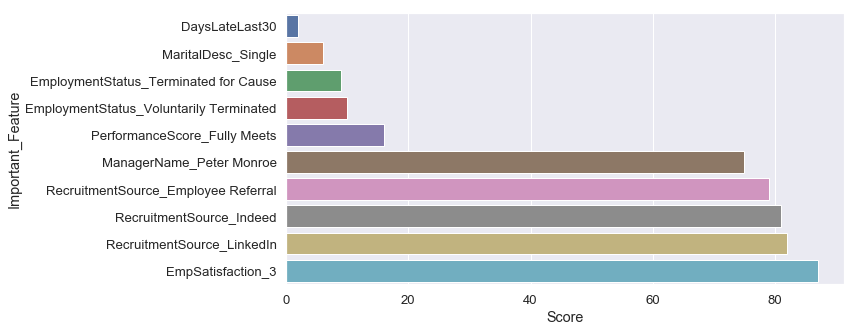

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(x='Score', y='Important_Feature', data=Select_columns)